In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

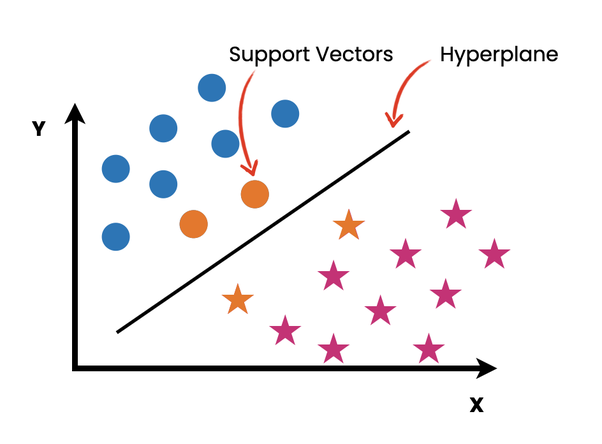

In [5]:
from IPython.display import Image
Image('./data_ml/svm.png')

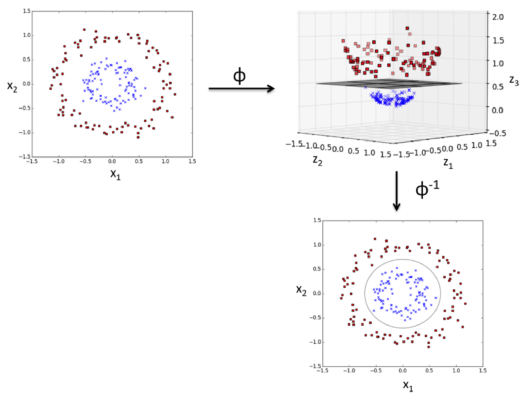

In [6]:
# 2차원에서 찾을 수 없다면
# kerenl support vector machine
Image('./data_ml/svm_kerneltrick.png')

In [10]:
# 어떤 종류의 꽃인지 예측해보기

In [9]:
df= sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [11]:
df.species.value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


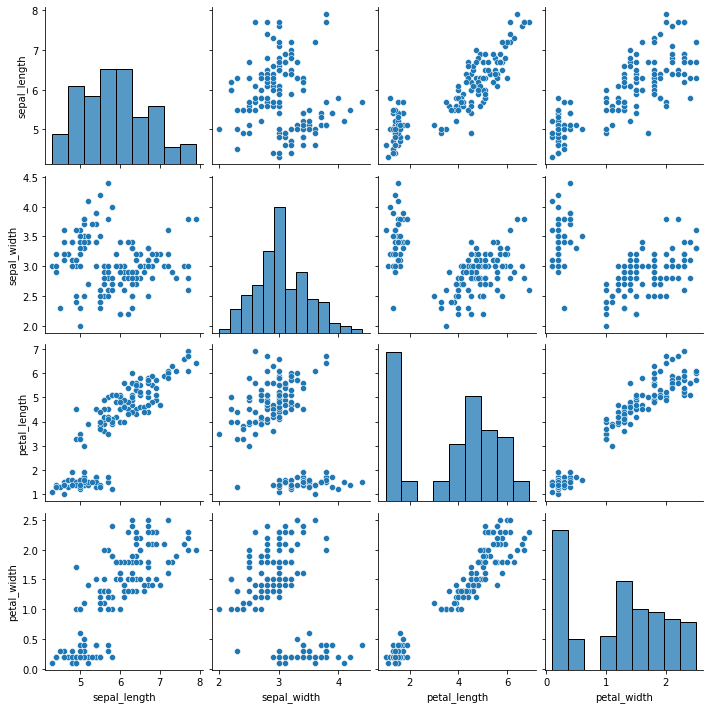

In [13]:
sns.pairplot(df)

In [18]:
y  = df.species
x = df.drop(columns='species')

In [19]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=777)

In [29]:
from sklearn.svm import SVC
svc = SVC(C=0.5, gamma=10)

In [30]:
svc.fit(x_train, y_train)

SVC(C=0.5, gamma=10)

In [31]:
preds = svc.predict(x_test)

In [32]:
from sklearn.metrics import classification_report
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         9
  versicolor       0.86      0.86      0.86         7
   virginica       0.93      0.93      0.93        14

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



In [33]:
# model optimization

In [40]:
# acc_lst = []
# for c in range(0,20,0.01):
#     for g in range(0, 100, 0.1):
#         svc = SVC(C=c, gamma = g)
#         svc.fit(x_train,y_train)
#         preds = svc.predict(preds, y_test)
#         svc.score(x_test,y_test)

In [41]:
# model optimization

In [42]:
from sklearn.model_selection import GridSearchCV

In [46]:
params = {'C':[0.1,1,10,100], 'gamma':[1,0.1,0.01, 0.001]}

In [48]:
grid = GridSearchCV(SVC(), param_grid = params, refit=True, verbose= True)

In [49]:
grid.fit(x_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [1, 0.1, 0.01, 0.001]},
             verbose=True)

In [50]:
grid.best_params_

{'C': 100, 'gamma': 0.01}

In [51]:
grid.best_score_

0.975

In [52]:
svc.fit(x_train, y_train)

SVC(C=0.5, gamma=10)

In [53]:
preds = svc.predict(x_test)

In [54]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         9
  versicolor       0.86      0.86      0.86         7
   virginica       0.93      0.93      0.93        14

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30

